In [1]:
import pandas as pd 
import numpy as np
import random as r

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.set_style("whitegrid")

%matplotlib inline

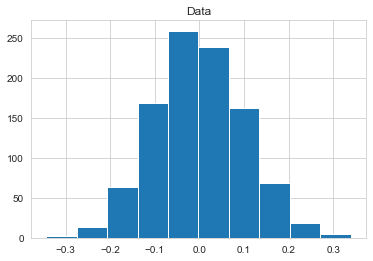

In [2]:
# Constantes du script précision après la virgule
PRECISION = 5
NB = 1000
MU, SIGMA = 0, 0.1 
LAMBDA_POISSON = 5
MAX_NAN = 10


In [ ]:
# DISTRIBUTION NORMALE
nData = np.random.normal(MU, SIGMA, NB)
nData = pd.DataFrame(nData, columns=['Data'])

# Histogramme 
nData.hist();

# Génération de données manquantes max 10
count = 0
while count < MAX_NAN:
    count += 1
    nData.loc[r.randint(1, NB), 'Data'] = np.nan

In [3]:
# MOYENNE ET VARIANCE
mean = round( nData.mean()[0], PRECISION)
variance = round( nData.var()[0], PRECISION)

print( f"LOI NORMALE MOYENNE : {mean} VARIANCE: {variance}" )

mean with np.nan values : -0.00076 and variance: 0.00996


In [4]:
# ON REMPLACE NaN par la médiane
nData.fillna(nData.median(), inplace=True)
mean = round( nData.mean()[0], PRECISION)
variance = round( nData.var()[0], PRECISION)
print( f"LOI NORMALE MOYENNE : {mean} VARIANCE: {variance}")

mean with np.nan values : -0.00078 and variance: 0.00986


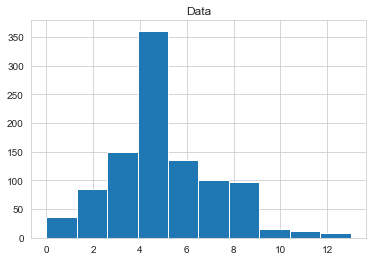

In [5]:
# LOI DISSIMETRIQUE : LOI DE POISSON
poisson = np.random.poisson(LAMBDA_POISSON, NB)
pData = pd.DataFrame(poisson, columns=['Data'])
pData.hist();

# GENERATION DONNEES MANQUANTES
count = 0
while count < MAX_NAN:
    count += 1
    # Sélectionne au hasard un index pour lui donner une valeur NaN ie donnée manquante
    pData.loc[r.randint(1, NB), 'Data'] = np.nan

# Valeurs NaN manquantes
dataNaN = pData[ pData['Data'].isnull() ] 

In [6]:
# MOYENNE ER VARIANCE
mean = round( pData.mean()[0], PRECISION)
variance = round( pData.var()[0], PRECISION)
print( f"LOI POISSON MOYENNE : {mean} VARIANCE: {variance}" )

mean with np.nan values : 4.97576 and variance: 5.03076


In [7]:
# ON REMPLACE PAR LA MEDIANE LES NAN
pData.fillna(pData.median(), inplace=True)
mean = round( pData.mean()[0], PRECISION)
variance = round( pData.var()[0], PRECISION)
print( f"LOI POISSON MOYENNE : {mean} VARIANCE: {variance}" )


mean with np.nan values : 4.976 and variance: 4.9804
